# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA- Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

1. Data Import: Import the dataset into a statistical software tool such as Python or R.
2. Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
3. Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
4. Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
5. Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
6. Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
7. Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
8. Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

## 1. Data Import
Import the dataset into a statistical software tool

In [1]:
! pip install -U kaleido

In [2]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [3]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore") 

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np

In [4]:
# load data into data frame
data = pd.read_csv('Wholesale_Data.csv')
# view first 5 rows of dataframe
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## 2. Data Cleaning
Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious error

In [5]:
# check for nulls, no nulls found, all data types are integers, no need to convert dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
#  check counts of each columns 

# make list of columns in data
col_list = data.columns.tolist()
for col in col_list:
    print('\n',data[col].value_counts())


 Channel
1    298
2    142
Name: count, dtype: int64

 Region
3    316
1     77
2     47
Name: count, dtype: int64

 Fresh
9670     2
3        2
18044    2
8040     2
514      2
        ..
18827    1
10405    1
37036    1
30379    1
2787     1
Name: count, Length: 433, dtype: int64

 Milk
3045     2
1610     2
5139     2
2428     2
3587     2
        ..
1596     1
7152     1
13252    1
4280     1
1698     1
Name: count, Length: 421, dtype: int64

 Grocery
1664    2
2062    2
683     2
3600    2
6536    2
       ..
7305    1
3343    1
5034    1
8282    1
2510    1
Name: count, Length: 430, dtype: int64

 Frozen
2540    2
425     2
1285    2
4324    2
1619    2
       ..
2995    1
321     1
2279    1
825     1
65      1
Name: count, Length: 426, dtype: int64

 Detergents_Paper
118    2
955    2
256    2
69     2
918    2
      ..
516    1
399    1
51     1
960    1
477    1
Name: count, Length: 417, dtype: int64

 Delicassen
3       4
834     4
548     3
610     3
395     3
       ..
31

In [7]:
# check for duplicate rows... none found
data[data.duplicated(keep=False)]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


## 3. Data Description

Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.

In [8]:
data.describe()

# at first glance possible outliers in Grocery, Frozen, Detergents_Paper, Delicassen

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## 4. Data Visualization

Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.

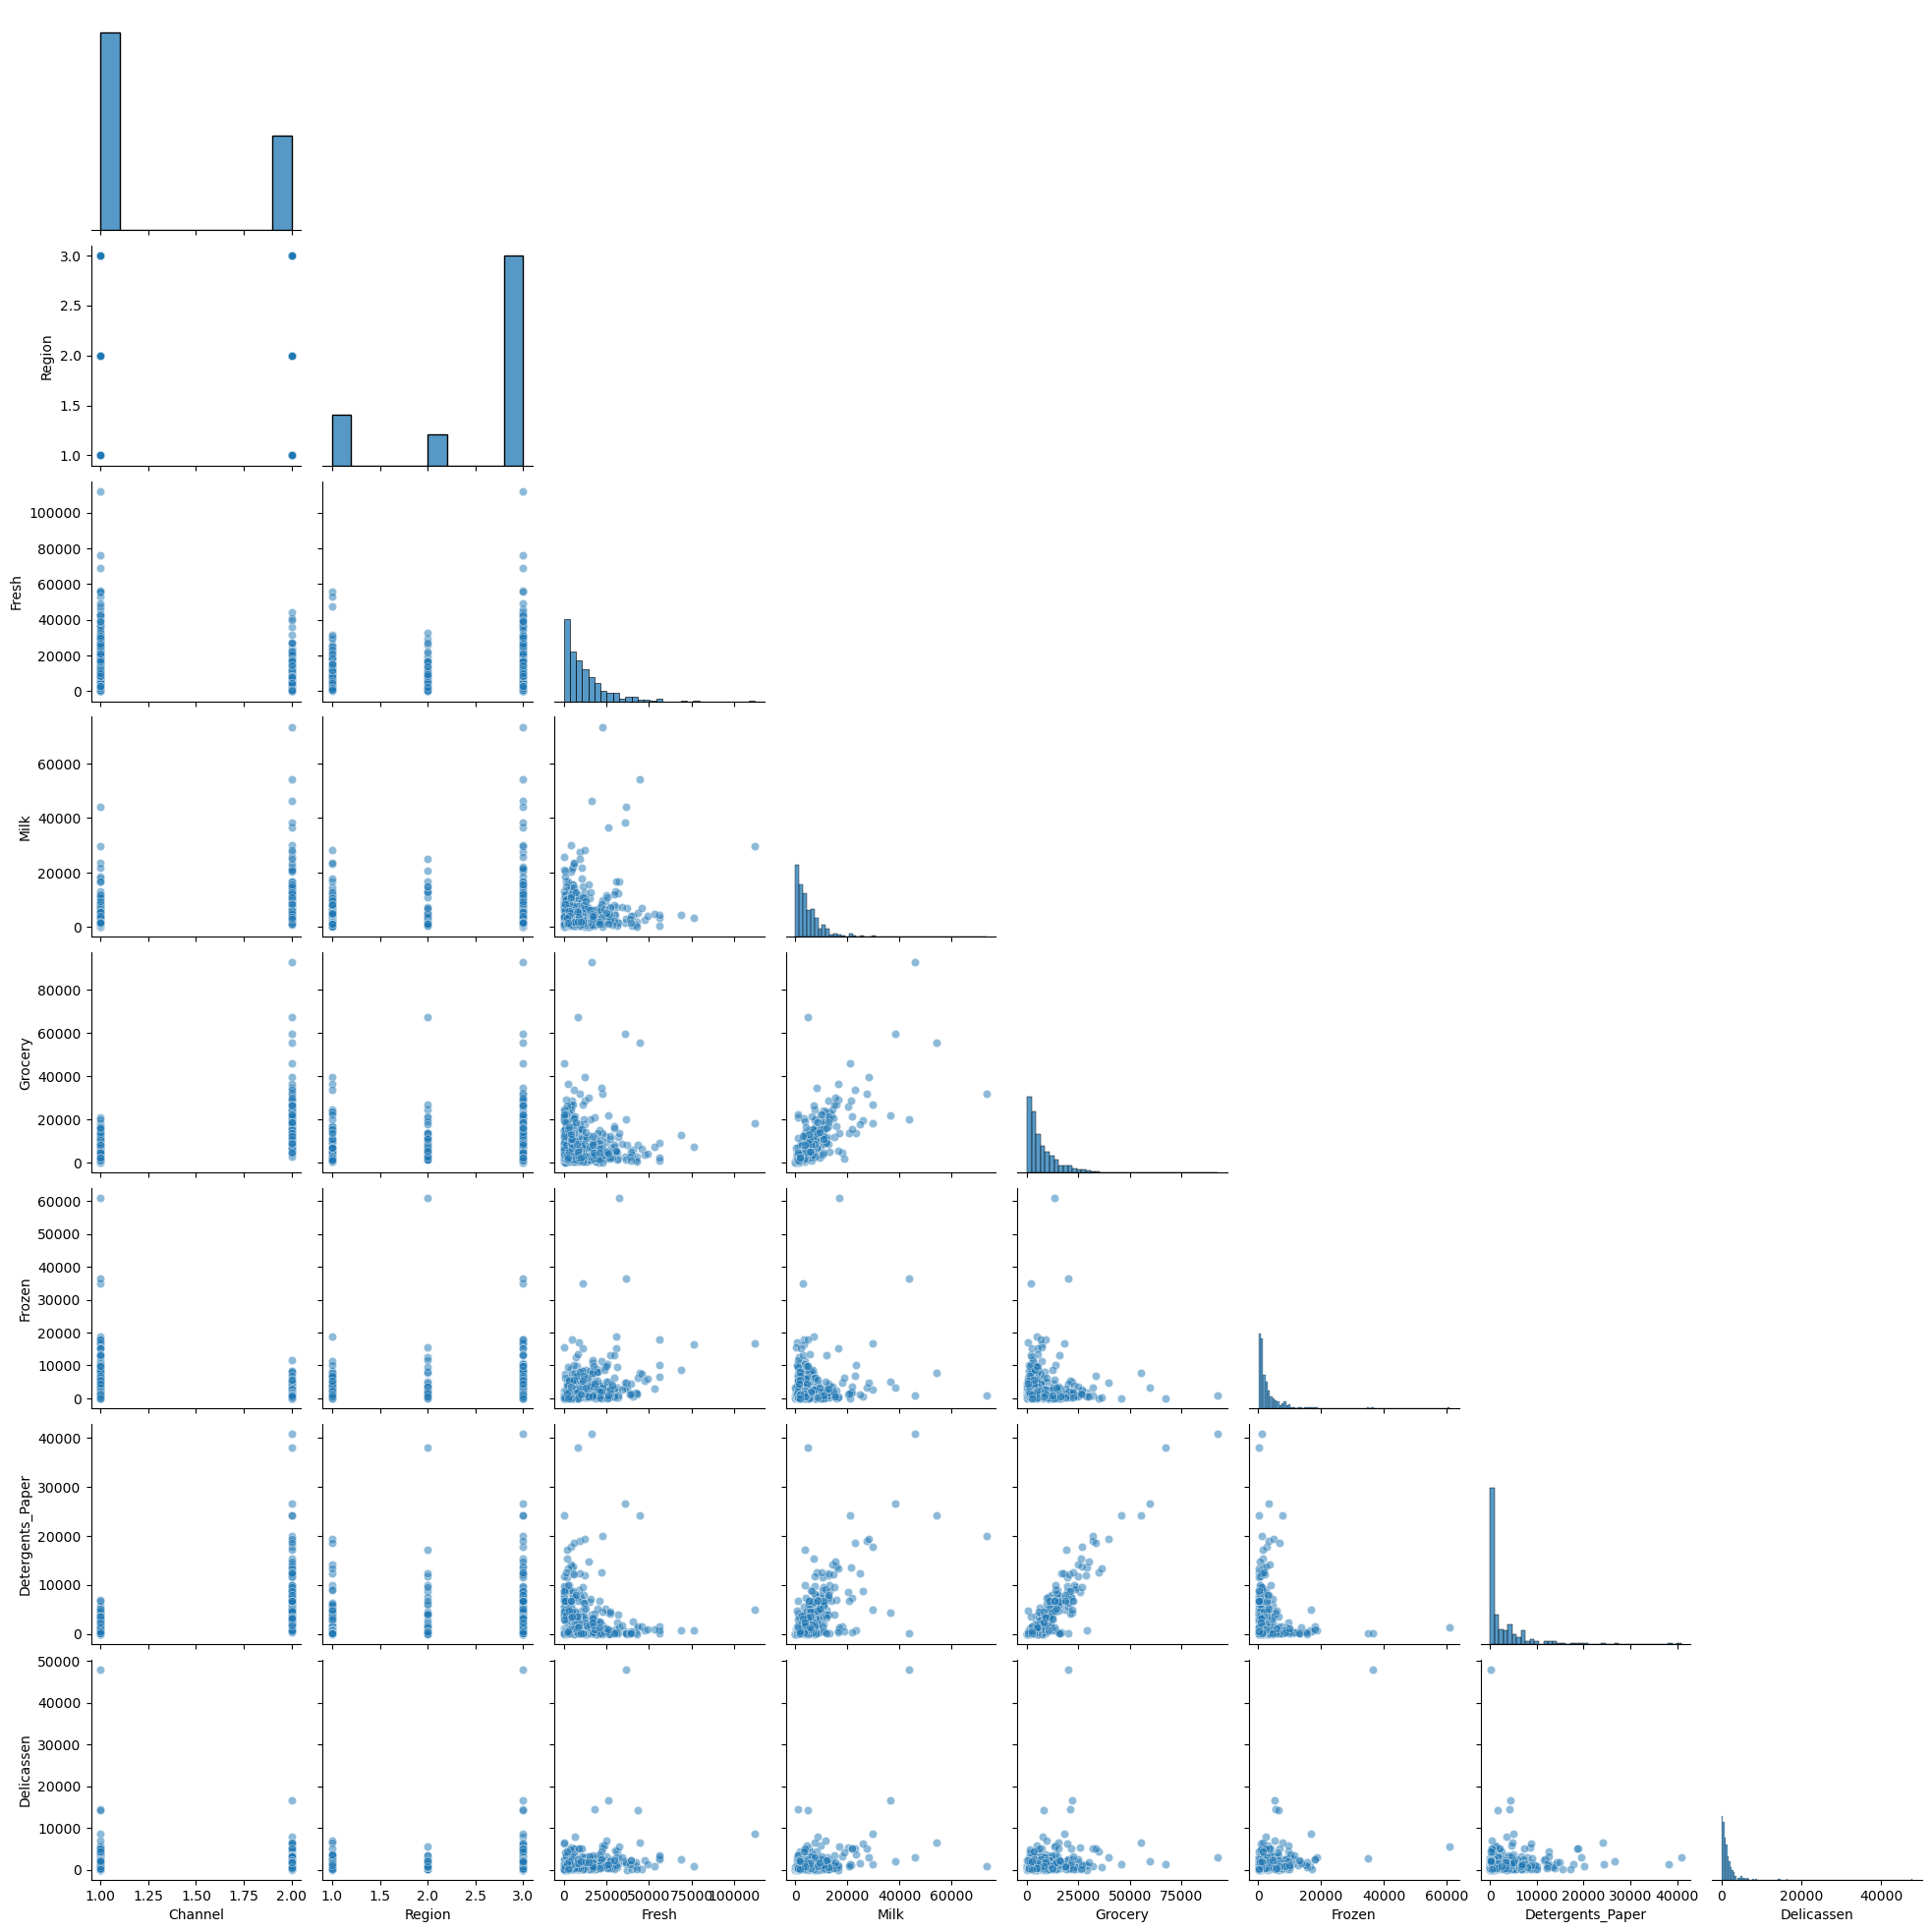

In [9]:
color_palette = "colorblind"
# pairplot to quickly visualise all features
# vizualise all features, remove top right corner, duplicates
sns.pairplot(data, kind='scatter', plot_kws={'alpha':0.5}, palette=color_palette, corner=True)

Pairplot findings (visually)
* all distributiuons appear right skewed - logarithmic or exponential
* strong linear relationship between Grocery and Detergents_paper, Grocery and Milk

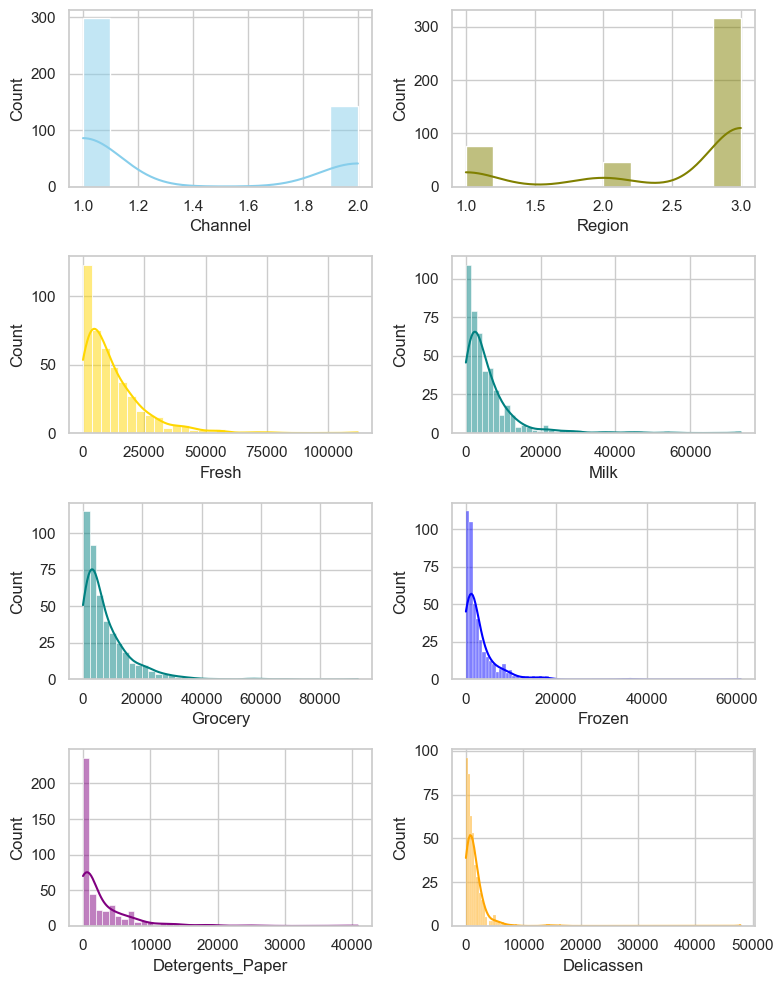

In [10]:
# for more detail, now check distributions of each feature 

sns.set(style="whitegrid")
fig,axs = plt.subplots(4,2, figsize = (8,10))
sns.histplot(data=data, x="Channel", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=data, x="Region", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=data, x="Fresh", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=data, x="Milk", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=data, x="Grocery", kde=True, color="teal", ax=axs[2, 0])
sns.histplot(data=data, x="Frozen", kde=True, color="blue", ax=axs[2, 1])
sns.histplot(data=data, x="Detergents_Paper", kde=True, color="purple", ax=axs[3,0])
sns.histplot(data=data, x="Delicassen", kde=True, color="orange", ax=axs[3,1])

fig.tight_layout()

Feature Distribution Findings:
* all features appear to have right skew

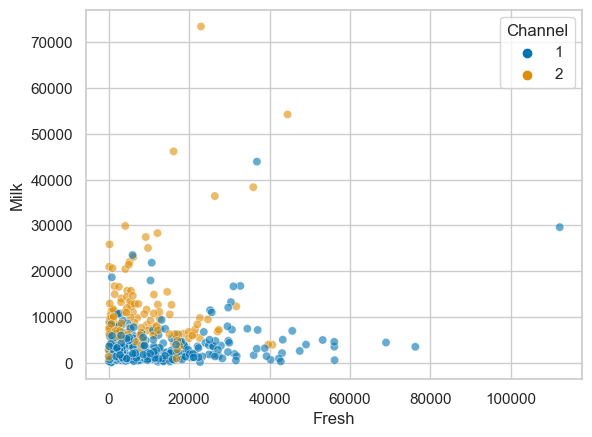

In [11]:
# visualise two features Milk and Fresh
sns.scatterplot(data=data, x='Fresh', y='Milk', hue="Channel", alpha=0.6, palette=color_palette)

# save the plot as PNG file
plt.savefig("milk_fresh_channel_scatter.png")

# channel 2 appears to purchase larger quantities of milk

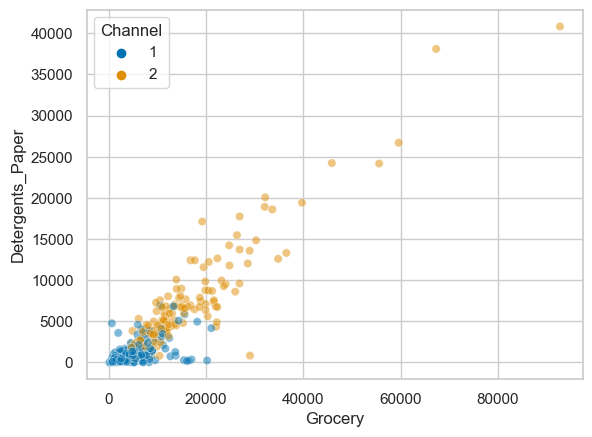

In [12]:
color_palette = "colorblind"
# visualise two features Grocery and Detergents_Paper
sns.scatterplot(data=data, x='Grocery', y='Detergents_Paper', hue="Channel", alpha=0.5, palette=color_palette)


# save the plot as PNG file
plt.savefig("paper_grocery_channel_scatter.png")

# channel 2 contributes significantly to linear relationship between detergents and grocery

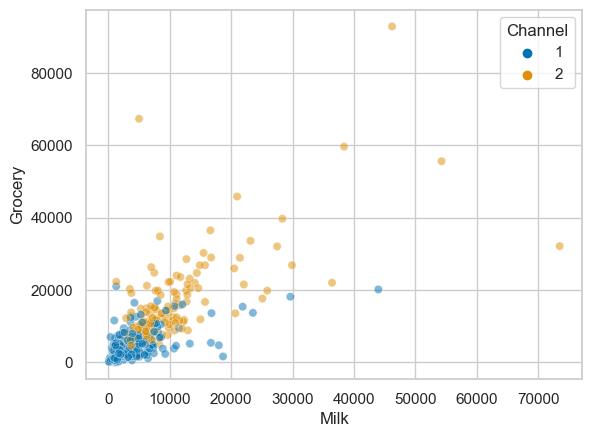

In [138]:
# visualise two features Milk and Detergents_Paper
sns.scatterplot(data=data, x='Milk', y='Grocery', hue="Channel", alpha=0.5, palette=color_palette)


# save the plot as PNG file
plt.savefig("milk_Grocery.png")

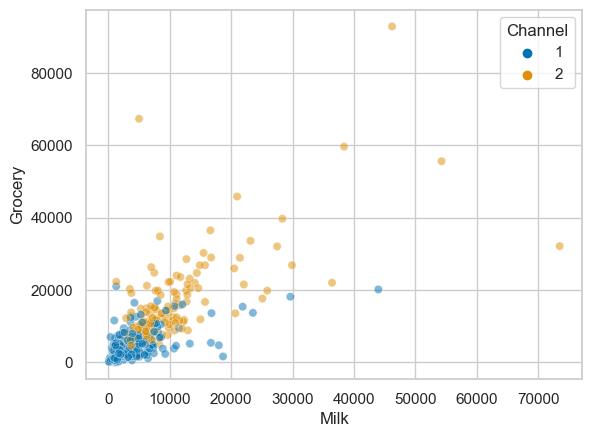

In [138]:
# visualise two features Milk and Detergents_Paper
sns.scatterplot(data=data, x='Milk', y='Grocery', hue="Channel", alpha=0.5, palette=color_palette)


# save the plot as PNG file
plt.savefig("milk_Grocery.png")

In [14]:
# col_list
num_col_list = [
'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']


In [15]:
data.shape

(440, 8)

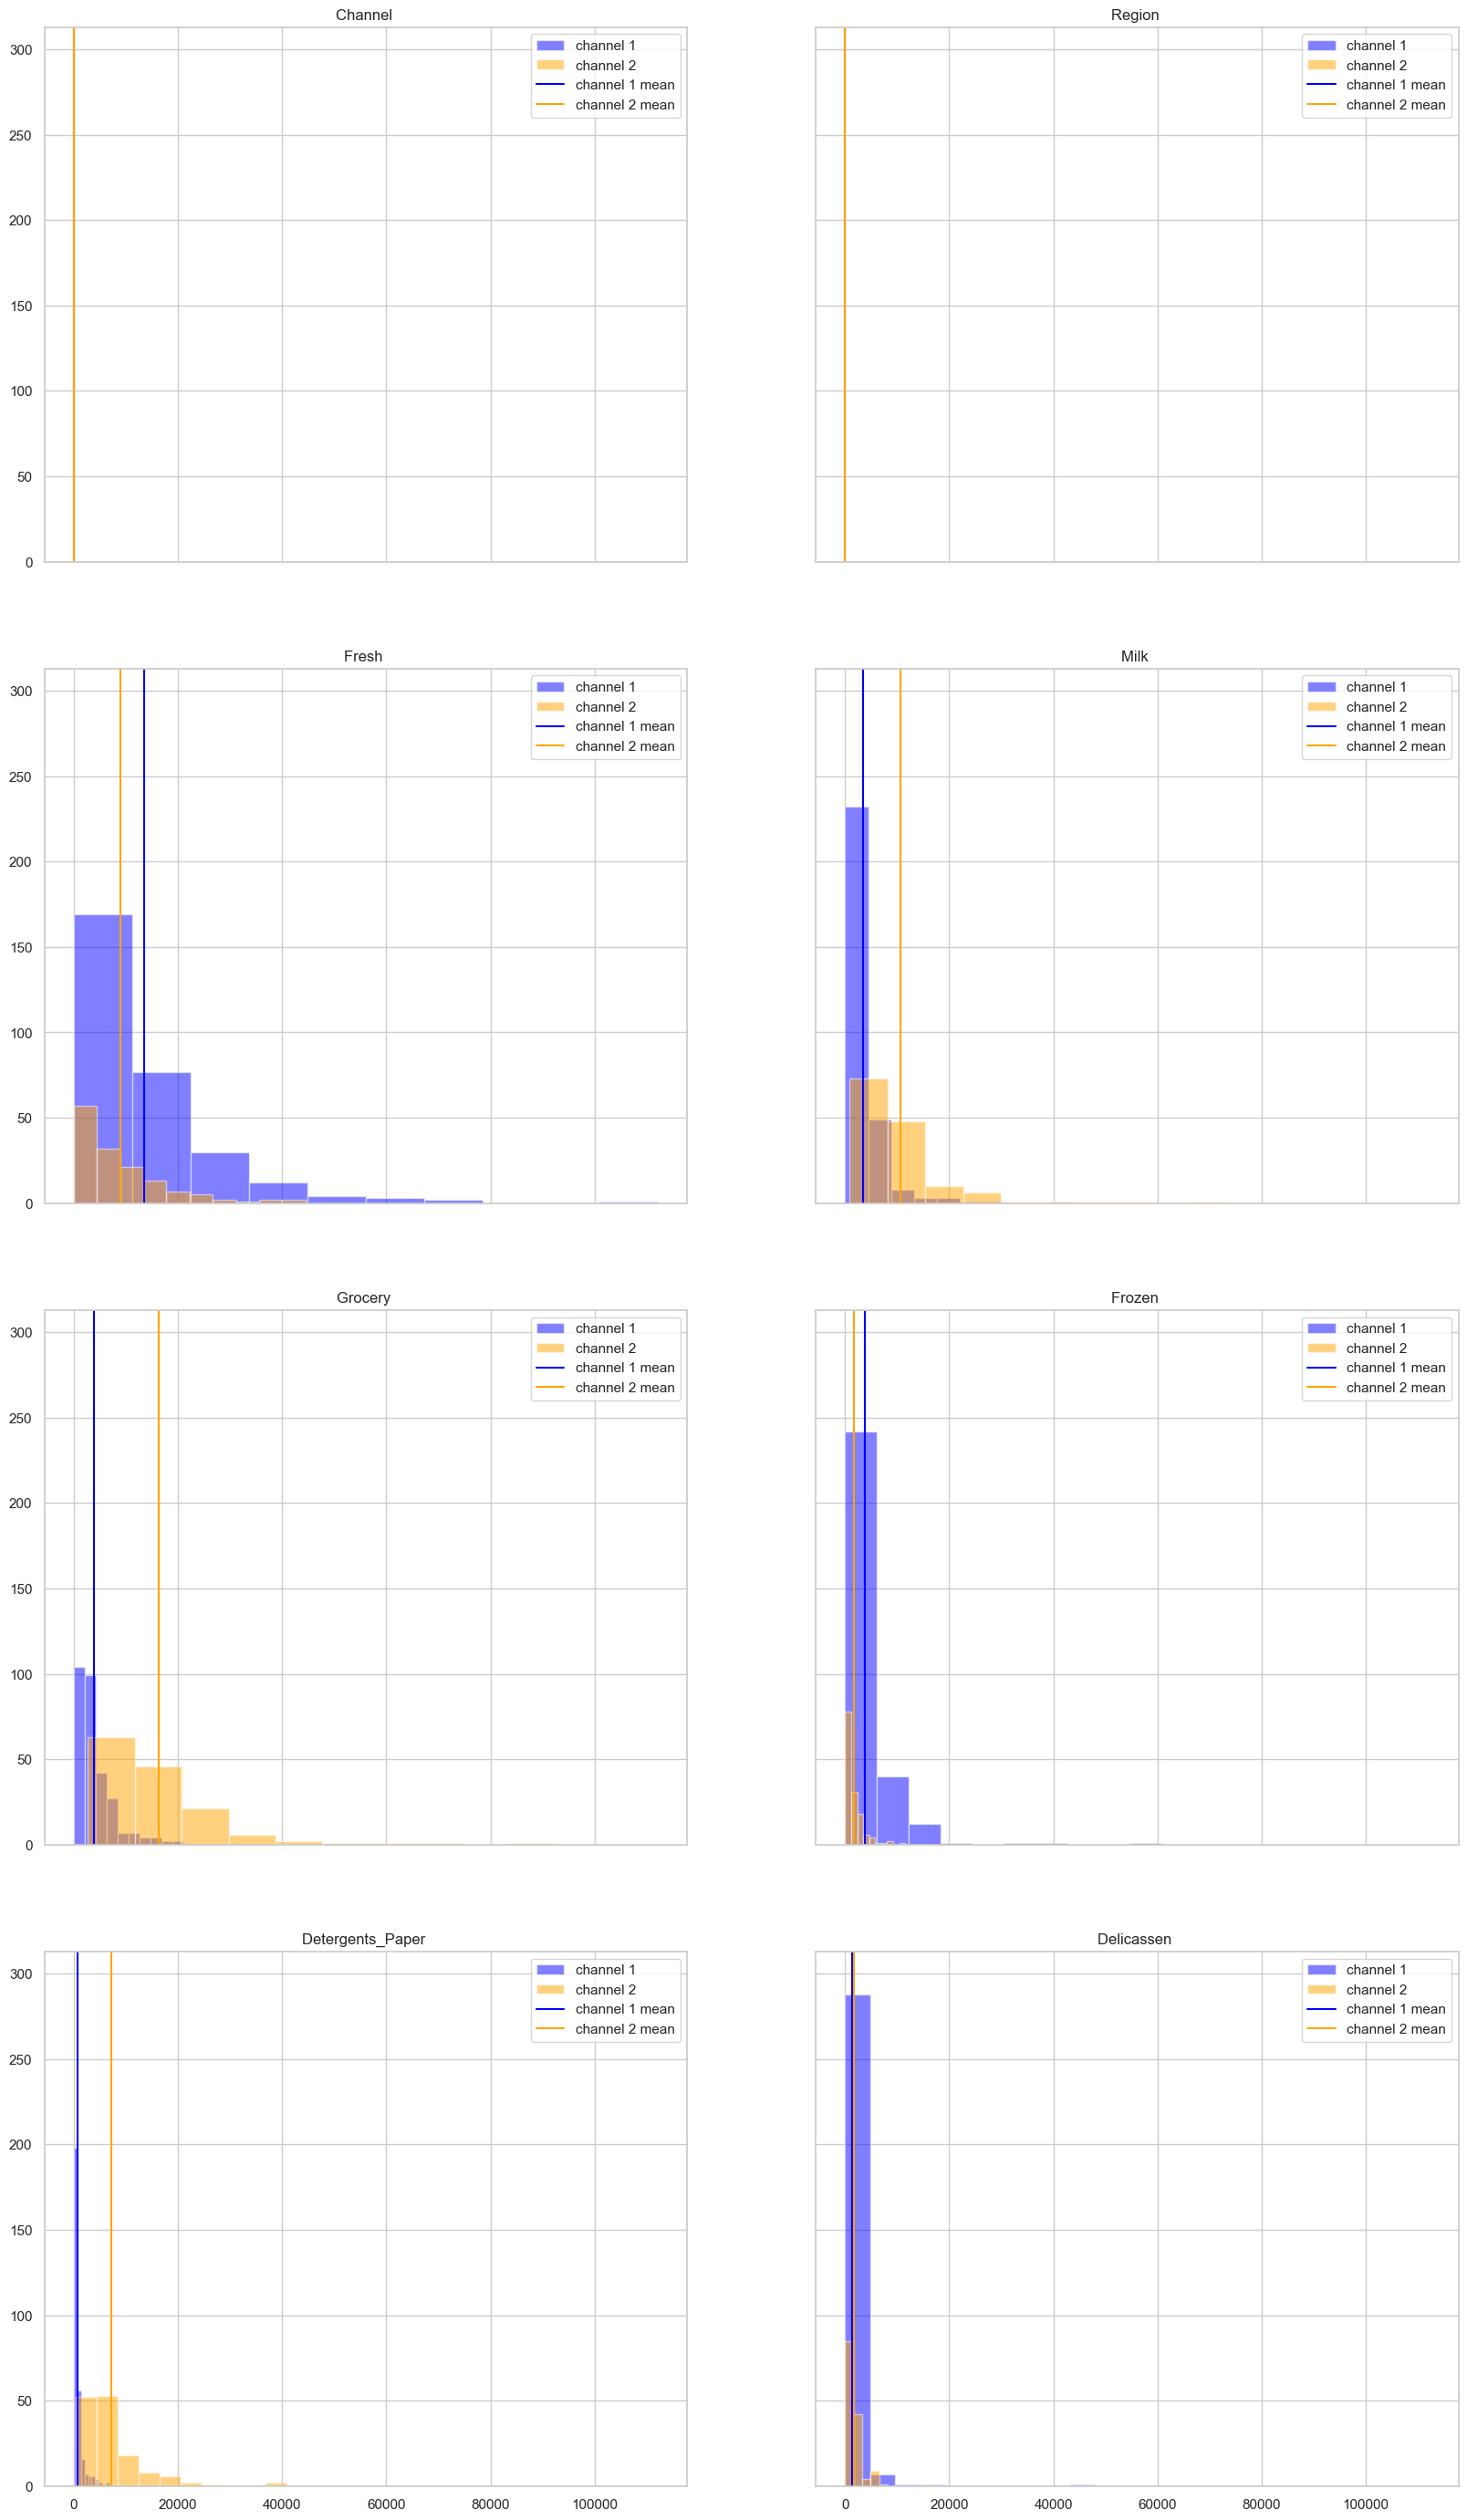

In [16]:
# plot sales by category and channel (how do sales differ by channel and category)
row = 0
col = 0
fig, axs = plt.subplots(4,2,figsize=(20,35), sharex=True, sharey=True)
for row in range(4): # each subplot row
    for col in range(2): #each subplot column
        # dataset = data[num_col_list] 
        feature_name = data.iloc[:,row*2+col].name
        # print(feature_name, row, col, '==',(row*2)+col) # QA 
        channel_1 = data.loc[data['Channel'] == 1, feature_name]
        channel_2 = data.loc[data['Channel'] == 2, feature_name]
        axs[row,col].hist(channel_1, alpha = 0.5, color='blue', label = 'channel 1')
        axs[row,col].hist(channel_2, alpha = 0.5, color='orange',  label = 'channel 2')
        axs[row,col].axvline(channel_1.mean(), color='blue', label = 'channel 1 mean')
        axs[row,col].axvline(channel_2.mean(), color='orange', label = 'channel 2 mean')
        axs[row,col].set_title(f"{feature_name} ")
        axs[row,col].legend()
plt.xticks()
plt.legend()
plt.show()

In [158]:
dataset = data[num_col_list] 
dataset

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


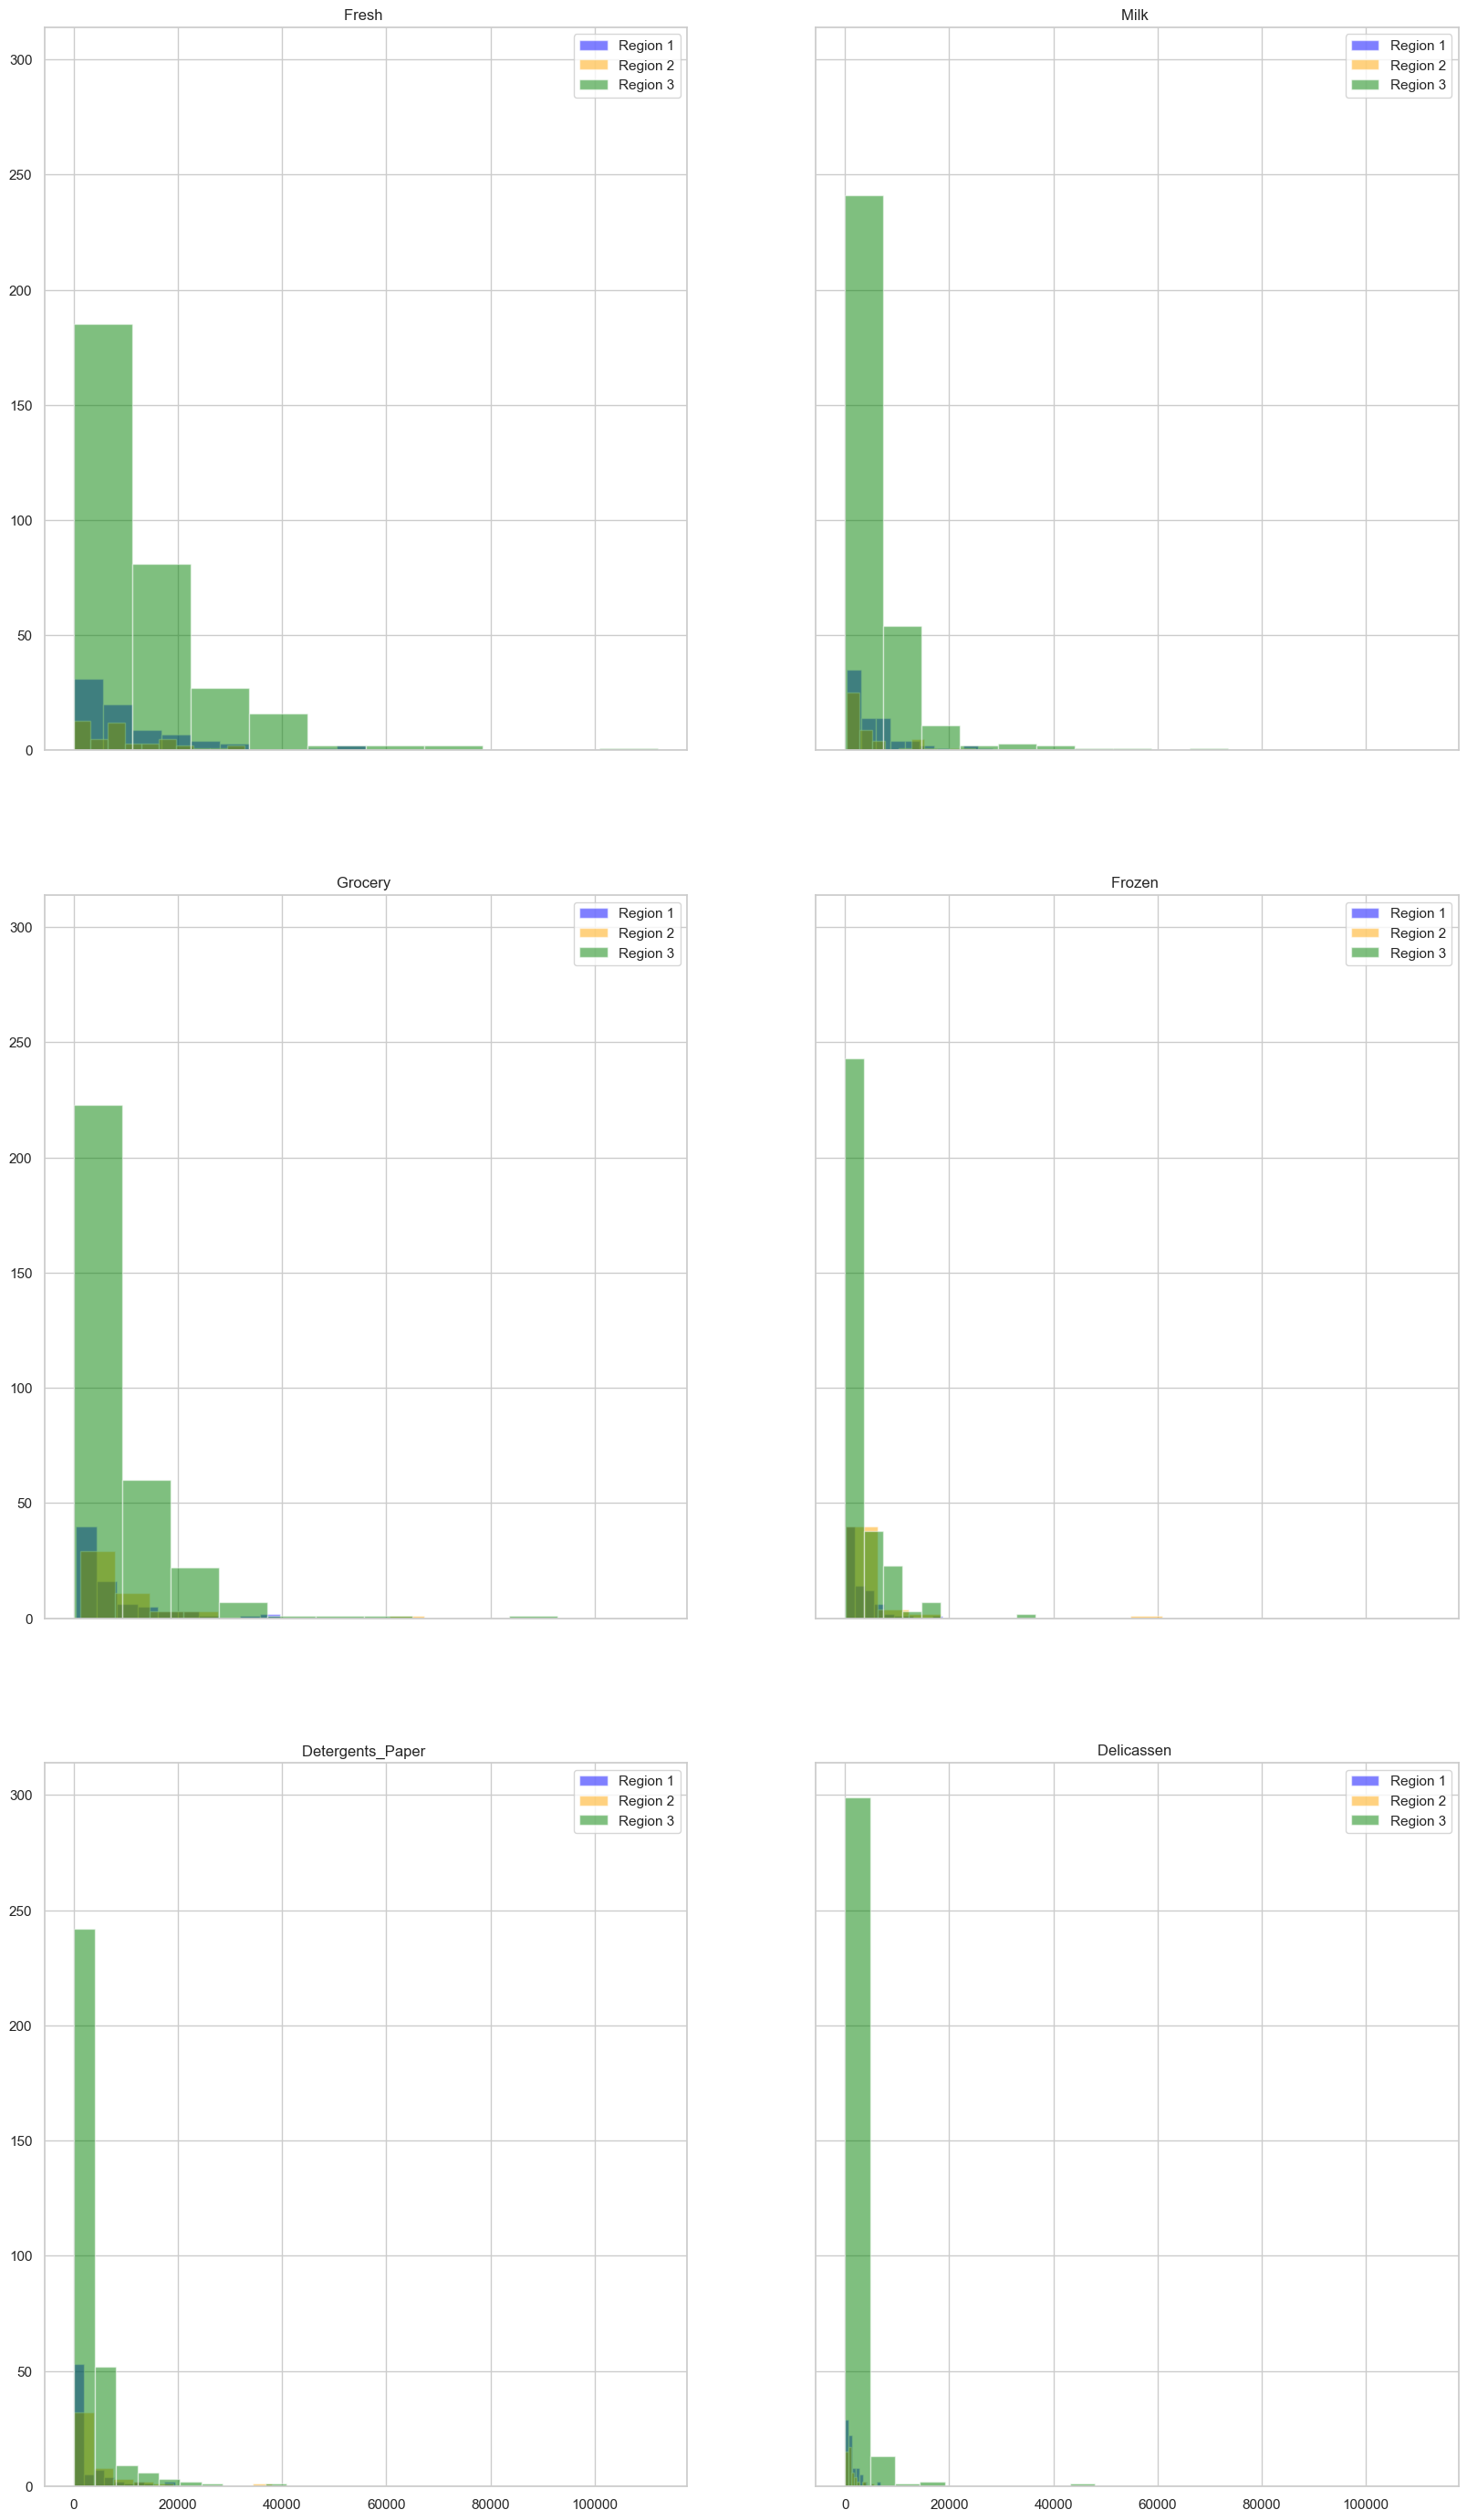

In [161]:
# plot avg sales by category and region (how do sales differ by channel and category)
row = 0
col = 0
fig, axs = plt.subplots(3,2,figsize=(20,35), sharex=True, sharey=True)
for row in range(3): # each subplot row
    for col in range(2): #each subplot column
        feature_name = dataset.iloc[:,row*2+col].name
        # print(feature_name, row, col, '==',(row*2)+col) # QA 
        region_1 = data.loc[data['Region'] == 1, feature_name]
        region_2 = data.loc[data['Region'] == 2, feature_name]
        region_3 = data.loc[data['Region'] == 3, feature_name]
        axs[row,col].hist(region_1, alpha = 0.5, color='blue', label = 'Region 1')
        axs[row,col].hist(region_2, alpha = 0.5, color='orange',  label = 'Region 2')
        axs[row,col].hist(region_3, alpha = 0.5, color='green',  label = 'Region 3')
        # axs[row,col].axvline(region_1.mean(), color='blue', label = 'Region 1 mean')
        # axs[row,col].axvline(region_2.mean(), color='orange', label = 'Region 2 mean')
        # axs[row,col].axvline(region_3.mean(), color='orange', label = 'Region 3 mean')
        axs[row,col].set_title(f"{feature_name} ")
        axs[row,col].legend()
plt.xticks()
plt.legend()
plt.show()

In [18]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [150]:
# totals by Channel and Category
channel_avg = data.groupby('Channel').mean().map('{:,.0f}'.format)
channel_avg

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
Channel,,,,,,,,
1,3,"13,476","3,452","3,962","3,748",791,"1,416",1
2,3,"8,904","10,716","16,323","1,653","7,270","1,753",2


In [212]:
# totals by Region and Category
channel_avg = data.groupby('Channel').mean().map('{:.0f}'.format).reset_index()
channel_avg = channel_avg.melt(id_vars = 'Channel', value_vars = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"], var_name='Category')
channel_avg['value'] = channel_avg['value'].astype(int)

In [207]:
channel_avg.dtypes

Channel      int64
Category    object
value        int64
dtype: object

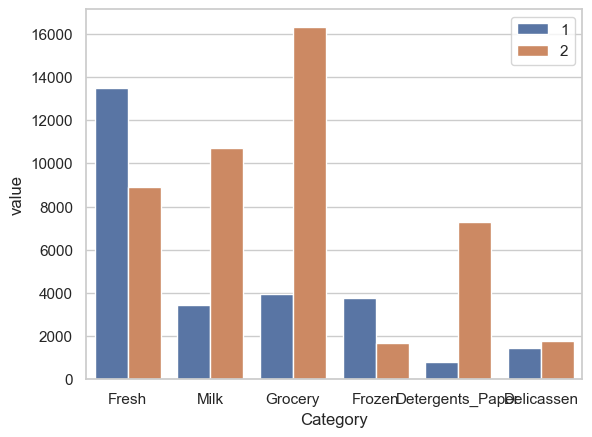

In [214]:
sns.barplot(data=channel_avg, x="Category", y="value", hue="Channel")
plt.legend()
plt.savefig('sales_channel.png')

In [192]:
# totals by Region and Category
region_avg = data.groupby('Region').mean().map('{:.0f}'.format).reset_index()
region_avg = region_avg.melt(id_vars = 'Region', value_vars = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"], var_name='Category')
region_avg

,Region,Category,value
0,1,Fresh,11102
1,2,Fresh,9888
2,3,Fresh,12533
3,1,Milk,5486
4,2,Milk,5088
5,3,Milk,5977
6,1,Grocery,7403
7,2,Grocery,9219
8,3,Grocery,7896
9,1,Frozen,3000


In [198]:
region_avg['value'] = region_avg['value'].astype(int)

In [199]:
region_avg.dtypes

Region       int64
Category    object
value        int64
dtype: object

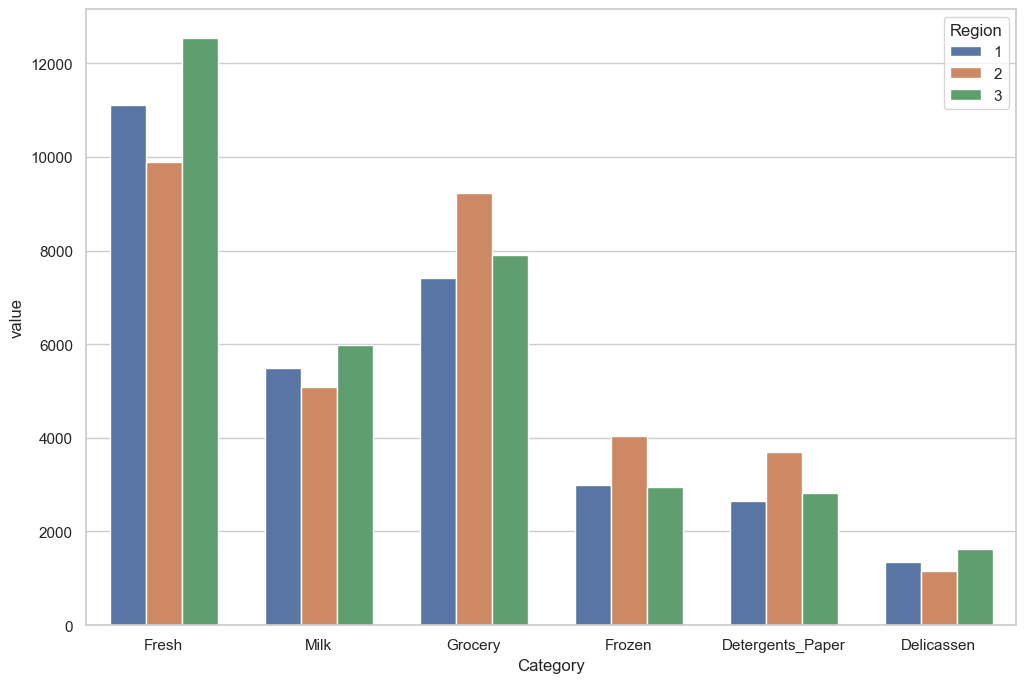

In [246]:
plt.figure(figsize=(12, 8))
sns.barplot(data=region_avg, x="Category", y="value", hue="Region", width=0.7)
plt.savefig('salesbyregion.png')


In [21]:
# averages by Region and Category
data.groupby('Region').mean().map('{:,.2f}'.format).drop(columns='Channel')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,
1,"11,101.73","5,486.42","7,403.08","3,000.34","2,651.12","1,354.90"
2,"9,887.68","5,088.17","9,218.60","4,045.36","3,687.47","1,159.70"
3,"12,533.47","5,977.09","7,896.36","2,944.59","2,817.75","1,620.60"


In [22]:
# averages by Channel and Category
data.groupby('Channel').mean().map('{:,.2f}'.format)


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
1,2.51,"13,475.56","3,451.72","3,962.14","3,748.25",790.56,"1,415.96"
2,2.61,"8,904.32","10,716.50","16,322.85","1,652.61","7,269.51","1,753.44"


## 5. Outlier Detection: 
Check for any outliers in the dataset and determine whether they are valid or erroneous data points.


(-5000.0, 120000.0)

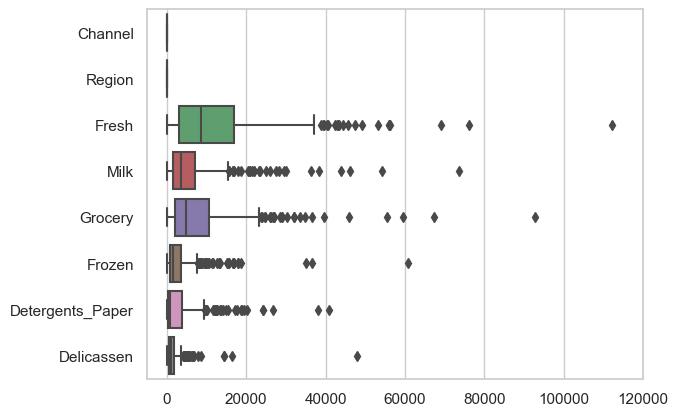

In [23]:
fig, ax = plt.subplots()
sns.boxplot(data=data, orient='h')
ax.set_xlim(-5000,120000) 
# ax.set_xticks(range(1,32))

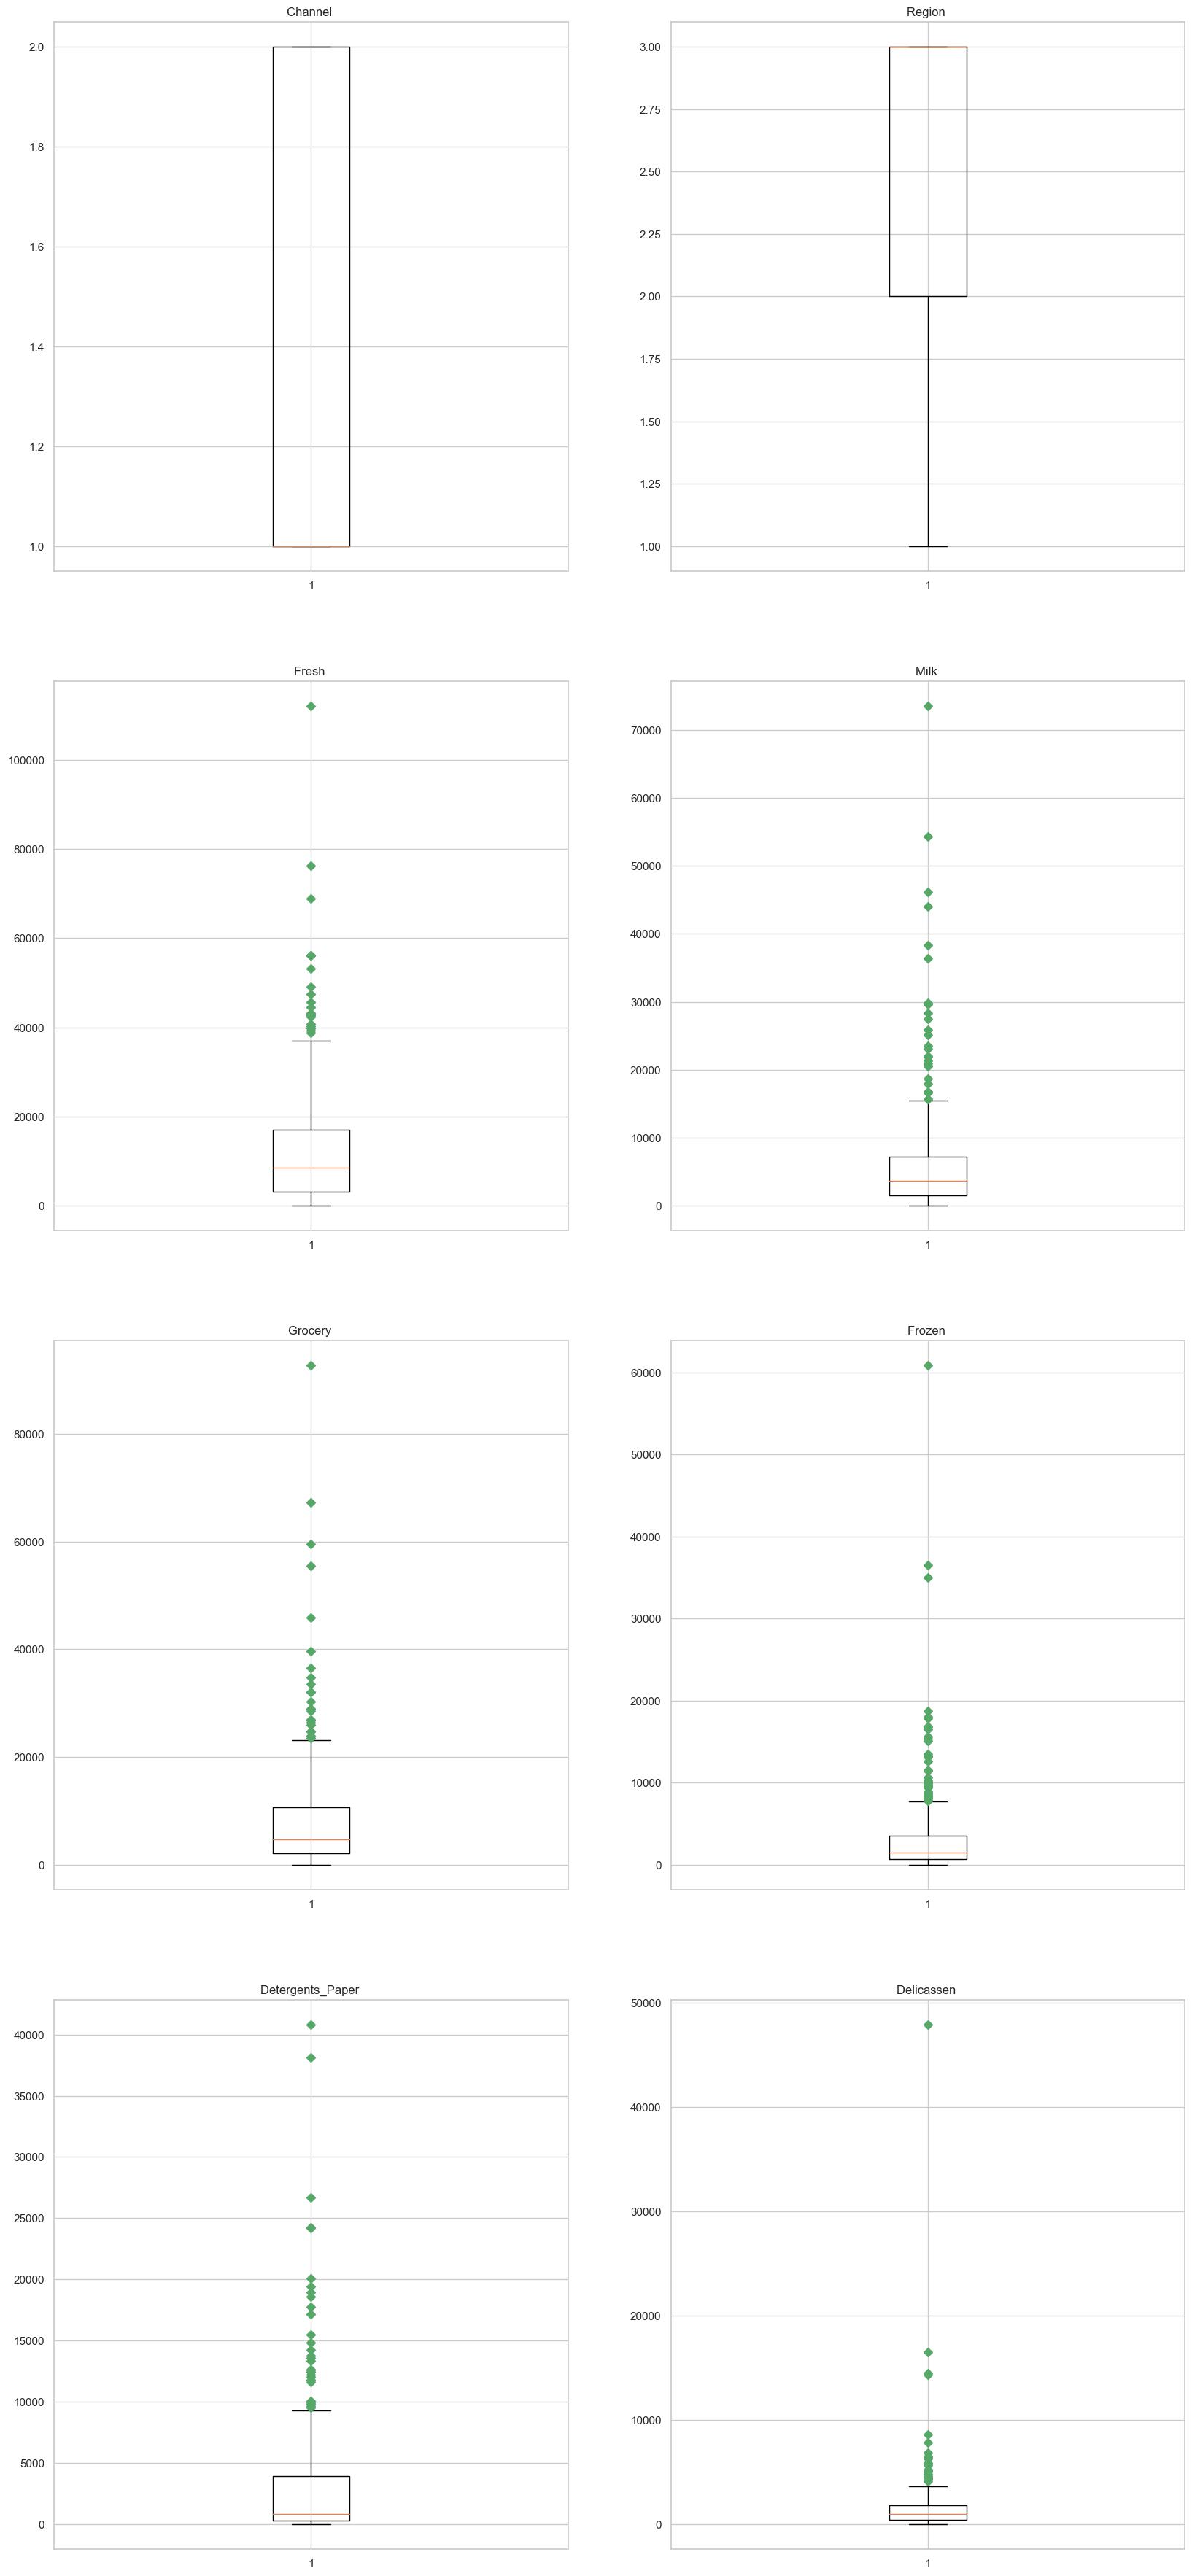

In [24]:
# Since the variables  all have different scales, plot each feature individually (alternative visual)
fig, axs = plt.subplots(4,2,figsize=(20,45))
for row in range(4): # each subplot row
    for col in range(2): # each subplot column
        feature_name = col_list[row*2+col]
        axs[row,col].boxplot(data[feature_name], 0, 'gD')
        axs[row,col].set_title(f"{feature_name} ")
plt.show()

In [25]:
# how many records are outliers in each features? 
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outlier_count = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
outliers = pd.DataFrame(outlier_count, columns = ['outlier_count']).reset_index()
outliers = outliers.rename(columns={'index':'feature'})
outliers['outlier_percent'] = round(outliers['outlier_count']/len(data), 3)

In [26]:
outliers.sort_values(by='outlier_percent', ascending=False)

,feature,outlier_count,outlier_percent
5,Frozen,43,0.098
6,Detergents_Paper,30,0.068
3,Milk,28,0.064
7,Delicassen,27,0.061
4,Grocery,24,0.055
2,Fresh,20,0.045
0,Channel,0,0.000
1,Region,0,0.000


In [27]:
outlier_rows = data[(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))].dropna(how='all').index

In [28]:
# show outlier rows to check for errors
data.iloc[outlier_rows,:]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,2,3,6353,8808,7684,2405,3516,7844
4,2,3,22615,5410,7198,3915,1777,5185
17,1,3,5876,6157,2933,839,370,4478
22,1,3,31276,1917,4469,9408,2381,4334
23,2,3,26373,36423,22019,5154,4337,16523
...,...,...,...,...,...,...,...,...
427,1,3,31012,16687,5429,15082,439,1163
431,1,3,8533,5506,5160,13486,1377,1498
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346


Outlier findings:
* All features (aside from Region and Chanel) have between 4.5% and 10% outliers
* outliers do not appear to be errors so will not remove them from the data set

## 6. Correlation Analysis

Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.

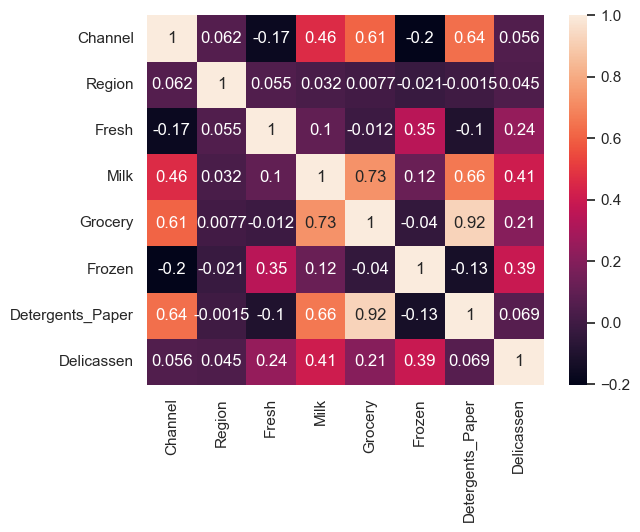

In [29]:
corr_matrix = data.corr()
# heatmap of all correlations with 'best' features 
sns.heatmap(corr_matrix, annot=True)
plt.savefig("corr_matrix.png")
plt.show()

Findings:
Highly correlated variables:
* High correlation (0.7-0.9) - 
    * Grocery + Milk, - 0.73
    * Detergents_Paper + Grocery - 0.92
* Moderate correlation (0.5-0.7) - 
    * Grocery * Milk -0.73
    * Detergents_Paper + Milk - 0.66
    * Grocery + Chanel -  0.61
    * Detergents_Paper + Channel - 0.64
    
Weakest correlations (examples)
* Frozen + Grocery
* Fresh + Grocery

## 7. Data Transformation
If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.

In [30]:
col_list

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

In [31]:
num_col_list = [
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

#### Log Transform Numeric Features
As previously observed, since most of the numeric features are right skewed, perform log transformation to normalize the distribution

In [32]:
data_log = np.log(data[num_col_list])

In [33]:
data_log

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


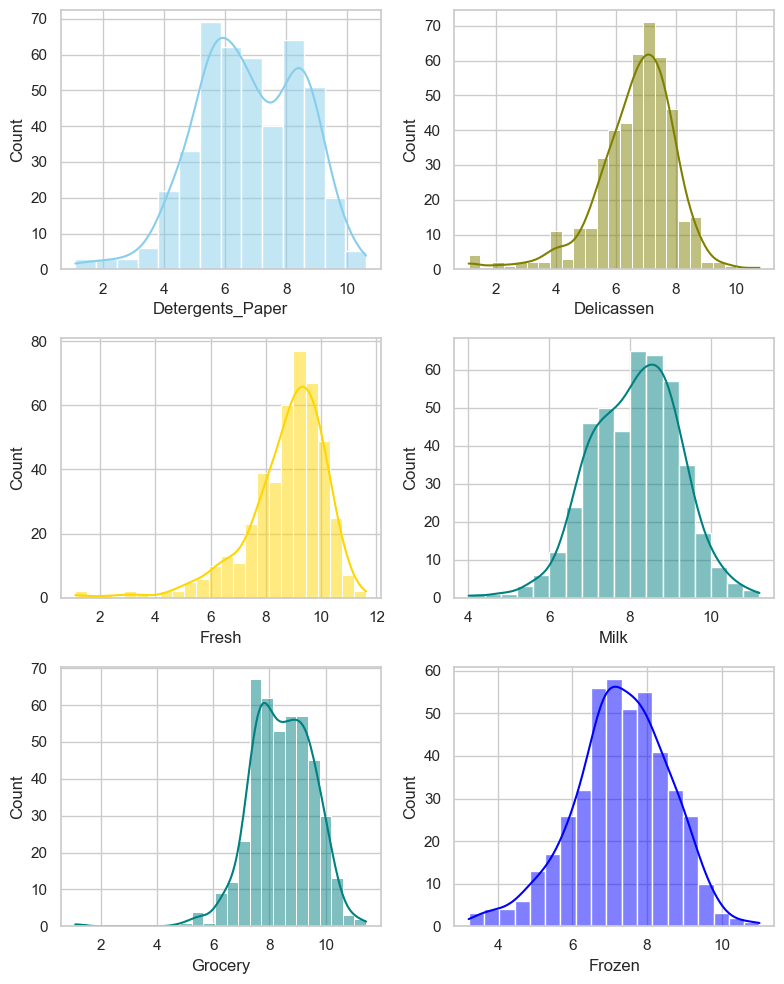

In [34]:
# QA - check how distributions changed after applying log. 
# data appears more normally distributed now

sns.set(style="whitegrid")
fig,axs = plt.subplots(3,2, figsize = (8,10))
sns.histplot(data=data_log, x="Detergents_Paper", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=data_log, x="Delicassen", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=data_log, x="Fresh", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=data_log, x="Milk", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=data_log, x="Grocery", kde=True, color="teal", ax=axs[2, 0])
sns.histplot(data=data_log, x="Frozen", kde=True, color="blue", ax=axs[2, 1])

fig.tight_layout()

#### Scale Numeric Features (0 - 100)

Chose to scale between 0 - 100 range due to risk of categorical values would overpower clustering. 

In [35]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))

# Fit and transform the selected columns
data_scaled = scaler.fit_transform(data_log)

# Display the scaled DataFrame
data_scaled = pd.DataFrame(data_scaled, columns = num_col_list)
data_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,79.288723,71.800933,75.750683,27.535386,71.363429,63.025320
1,73.731323,72.020764,78.027617,54.572267,73.550999,65.951068
2,72.733194,70.523867,75.906754,58.561959,74.239396,81.297296
3,79.725336,42.783294,70.112707,71.121881,53.894058,66.020641
4,84.792151,63.752084,75.274829,64.810872,67.070216,77.020279
...,...,...,...,...,...,...
435,87.381523,74.879260,83.016803,80.334425,43.130747,68.181740
436,90.023208,45.275637,53.581150,66.625299,36.077029,68.826816
437,80.591091,78.365354,89.158277,36.691496,89.368583,66.467324
438,77.313362,49.794152,63.950109,47.786160,42.289829,67.804620


#### One hot encode categorical features (region, channel)

In [36]:
data.loc[data['Region'] == 2, ['Channel', 'Region']].head()

,Channel,Region
293,2,2
294,1,2
295,2,2
296,1,2
297,2,2


In [37]:
enc = OneHotEncoder(handle_unknown='ignore')

In [38]:
cat_feats = data[['Region', 'Channel']]

In [39]:
data_encoded = enc.fit_transform(data[['Region', 'Channel']])

In [40]:
# retreive the default feature names after encoding
col_names = enc.get_feature_names_out().tolist()
data_array = data_encoded.toarray()
# take encoded region and channel and store inside dataframe
data_encoded = pd.DataFrame(data=data_array, columns = col_names)

In [41]:
# merge encoded features df and numeric features df
data_clean = pd.concat([data_encoded, data_scaled], axis = 1)
data_clean

,Region_1,Region_2,Region_3,Channel_1,Channel_2,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.0,0.0,1.0,0.0,1.0,79.288723,71.800933,75.750683,27.535386,71.363429,63.025320
1,0.0,0.0,1.0,0.0,1.0,73.731323,72.020764,78.027617,54.572267,73.550999,65.951068
2,0.0,0.0,1.0,0.0,1.0,72.733194,70.523867,75.906754,58.561959,74.239396,81.297296
3,0.0,0.0,1.0,1.0,0.0,79.725336,42.783294,70.112707,71.121881,53.894058,66.020641
4,0.0,0.0,1.0,0.0,1.0,84.792151,63.752084,75.274829,64.810872,67.070216,77.020279
...,...,...,...,...,...,...,...,...,...,...,...
435,0.0,0.0,1.0,1.0,0.0,87.381523,74.879260,83.016803,80.334425,43.130747,68.181740
436,0.0,0.0,1.0,1.0,0.0,90.023208,45.275637,53.581150,66.625299,36.077029,68.826816
437,0.0,0.0,1.0,0.0,1.0,80.591091,78.365354,89.158277,36.691496,89.368583,66.467324
438,0.0,0.0,1.0,1.0,0.0,77.313362,49.794152,63.950109,47.786160,42.289829,67.804620


## 8. Feature Selection: 
Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

#### Note:

Perfomed PCA on features to be able to visualize results of Kmeans in Part 2

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

### Model

In [42]:
# store processed data from earlier steps into X variable for modelling
X = data_scaled

In [43]:
# determine optimal number of clusters - elbow method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method')

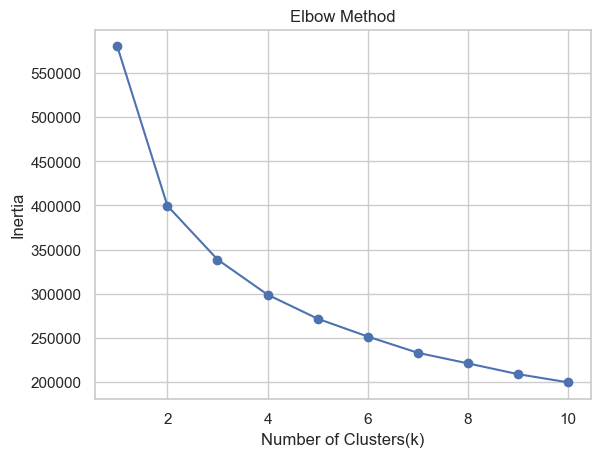

In [44]:
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

In [45]:
# Perform Kmeans using 4 clusters based on elbow method
kmeans = KMeans(n_clusters = 4, random_state = 42)
# assign data points to clusters, update the centroids, and repeat until convergence."
kmeans.fit(data_scaled)
cluster = kmeans.predict(data_scaled)

In [46]:
# QA - visualise the result. 
# Interpretation: cluster variable is the an array identifying the cluster number for each record in data_clean belongs to
cluster

array([3, 3, 3, 0, 0, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 2, 1, 0, 3, 3, 3, 2,
       0, 3, 3, 1, 2, 2, 3, 0, 3, 0, 2, 0, 2, 1, 0, 3, 1, 0, 0, 3, 1, 1,
       1, 3, 3, 3, 3, 3, 0, 1, 3, 1, 0, 3, 3, 1, 2, 1, 1, 3, 3, 3, 0, 1,
       1, 3, 0, 2, 0, 0, 0, 0, 3, 2, 0, 3, 2, 3, 2, 1, 3, 0, 3, 3, 3, 0,
       2, 0, 2, 0, 3, 0, 1, 1, 1, 2, 2, 0, 3, 3, 3, 0, 0, 2, 1, 3, 1, 1,
       2, 3, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 3, 0, 0, 0, 3, 1, 2, 0, 2,
       2, 2, 2, 2, 3, 1, 2, 2, 0, 2, 2, 0, 2, 3, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 1, 3, 0, 3, 1, 3, 2, 0, 3, 3, 3, 3, 1, 2, 2, 1, 3, 1, 1, 2, 1,
       0, 2, 2, 0, 3, 3, 1, 0, 1, 2, 2, 1, 3, 1, 0, 2, 2, 1, 2, 0, 0, 3,
       0, 2, 3, 3, 0, 1, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 1, 2, 1, 2,
       2, 1, 0, 0, 2, 2, 3, 2, 2, 0, 0, 3, 2, 1, 0, 1, 2, 2, 2, 0, 0, 0,
       0, 3, 3, 3, 2, 2, 2, 0, 2, 3, 0, 3, 3, 2, 2, 0, 0, 0, 2, 2, 2, 0,
       1, 3, 3, 0, 3, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 3, 2, 3, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 2, 0, 3, 0, 1, 0, 3, 3, 2, 3,

### Visualise Clusters
To visualise clusters, peform PCA on resulting cluster centre positions to go from 9 features in data scaled to 2 components 

In [47]:
#pca only on numeric features - 2 components 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

dfx_pca = pca.fit_transform(data_scaled)

In [48]:
# QA - Show result 
dfx_pca[:10]

array([[-22.76450978,   8.20386398],
       [-20.86548257,  -9.67666423],
       [-21.31222528, -18.53170065],
       [ 15.50153329, -17.60992089],
       [ -9.0667177 , -25.47901907],
       [-14.69100154,  -0.35884172],
       [-12.09292365,   8.48722932],
       [-16.50800566,  -9.26177542],
       [ -9.82674027,  11.23715708],
       [-31.87887092,  -6.71865375]])

In [49]:
cluster_asst = kmeans.labels_

In [50]:
cluster

array([3, 3, 3, 0, 0, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 2, 1, 0, 3, 3, 3, 2,
       0, 3, 3, 1, 2, 2, 3, 0, 3, 0, 2, 0, 2, 1, 0, 3, 1, 0, 0, 3, 1, 1,
       1, 3, 3, 3, 3, 3, 0, 1, 3, 1, 0, 3, 3, 1, 2, 1, 1, 3, 3, 3, 0, 1,
       1, 3, 0, 2, 0, 0, 0, 0, 3, 2, 0, 3, 2, 3, 2, 1, 3, 0, 3, 3, 3, 0,
       2, 0, 2, 0, 3, 0, 1, 1, 1, 2, 2, 0, 3, 3, 3, 0, 0, 2, 1, 3, 1, 1,
       2, 3, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 3, 0, 0, 0, 3, 1, 2, 0, 2,
       2, 2, 2, 2, 3, 1, 2, 2, 0, 2, 2, 0, 2, 3, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 1, 3, 0, 3, 1, 3, 2, 0, 3, 3, 3, 3, 1, 2, 2, 1, 3, 1, 1, 2, 1,
       0, 2, 2, 0, 3, 3, 1, 0, 1, 2, 2, 1, 3, 1, 0, 2, 2, 1, 2, 0, 0, 3,
       0, 2, 3, 3, 0, 1, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 1, 2, 1, 2,
       2, 1, 0, 0, 2, 2, 3, 2, 2, 0, 0, 3, 2, 1, 0, 1, 2, 2, 2, 0, 0, 0,
       0, 3, 3, 3, 2, 2, 2, 0, 2, 3, 0, 3, 3, 2, 2, 0, 0, 0, 2, 2, 2, 0,
       1, 3, 3, 0, 3, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 3, 2, 3, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 2, 0, 3, 0, 1, 0, 3, 3, 2, 3,

In [51]:
kmeans.cluster_centers_[0, :]

array([80.40746046, 55.08316038, 68.51650287, 69.08901041, 54.17156119,
       62.61773959])

In [52]:
kmeans.cluster_centers_[:, 1]

array([55.08316038, 64.18934266, 44.79429752, 70.67094513])

In [53]:
# position of each centroid by feature (each column re
centres = pd.DataFrame(kmeans.cluster_centers_, columns=)
centres

,0,1,2,3,4,5
0,80.407460,55.083160,68.516503,69.089010,54.171561,62.617740
1,54.893500,64.189343,78.990908,30.630206,75.020740,45.887765
2,72.365220,44.794298,61.829984,49.212040,43.081934,53.032799
3,74.438298,70.670945,80.515619,51.821682,77.564748,64.364843


In [54]:
# convert kmeans centroids from 6 dimension to 2 dimmension to viz using PCA
centroids = pca.transform(centres)

In [55]:
# new position of each cluster in 2 dimensions 
centroids

array([[  9.64628472, -17.45318691],
       [-22.44965628,  27.28683186],
       [ 21.76521214,   7.61388243],
       [-24.18154915,  -7.27531459]])

In [56]:
centroids[:,0]

array([  9.64628472, -22.44965628,  21.76521214, -24.18154915])

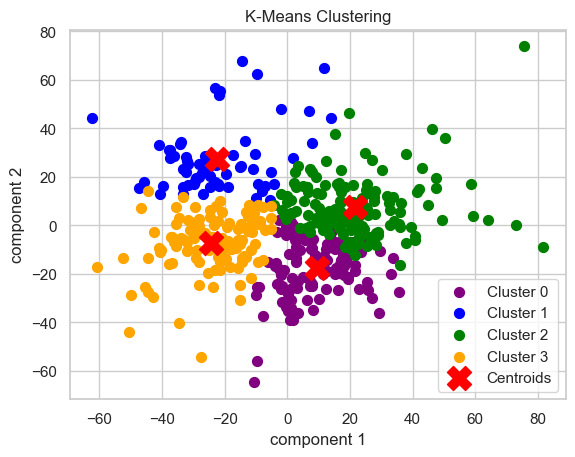

In [57]:
import numpy as np
from matplotlib import pyplot as plt

scatter_x = dfx_pca[:,0]
scatter_y = dfx_pca[:,1]
group = cluster
cdict = {0: 'purple', 1: 'blue', 2: 'green', 3: 'orange'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = f'Cluster {g}', s = 50)
ax.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
# ax.legend()
# plt.show()

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

#### Cluster Analysis by category

In [59]:
# add cluster assignment to data for further analysis
data['cluster'] = cluster
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0
436,1,3,39228,1431,764,4510,93,2346,0
437,2,3,14531,15488,30243,437,14841,1867,3
438,1,3,10290,1981,2232,1038,168,2125,2


In [ ]:
chart_data = data.drop(columns = ['Channel', 'Region'])
# chart_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,3
1,7057,9810,9568,1762,3293,1776,3
2,6353,8808,7684,2405,3516,7844,3
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,3
438,10290,1981,2232,1038,168,2125,2


In [61]:
chart_data = chart_data.groupby('cluster').mean()
chart_data = chart_data.reset_index()

In [63]:
values = chart_data.columns.to_list()[1:]
values

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [64]:
#unpivot DataFrame from wide format to long format
df_unpivot = pd.melt(chart_data, id_vars='cluster', value_vars=values)

#view updated DataFrame
print(df_unpivot)
# type(df_unpivot)

    cluster          variable         value
0         0             Fresh  19738.769912
1         1             Fresh   2912.666667
2         2             Fresh  10242.719178
3         3             Fresh  11616.228814
4         0              Milk   4091.619469
5         1              Milk   6902.650794
6         2              Milk   2012.917808
7         3              Milk  11519.076271
8         0           Grocery   4518.486726
9         1           Grocery  13350.349206
10        2           Grocery   2424.828767
11        3           Grocery  15193.864407
12        0            Frozen   7390.867257
13        1            Frozen    493.428571
14        2            Frozen   1699.979452
15        3            Frozen   2010.161017
16        0  Detergents_Paper    715.061947
17        1  Detergents_Paper   5923.650794
18        2  Detergents_Paper    329.760274
19        3  Detergents_Paper   6489.152542
20        0        Delicassen   2305.867257
21        1        Delicassen   

In [65]:
chart_data.columns.to_list()

['cluster',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

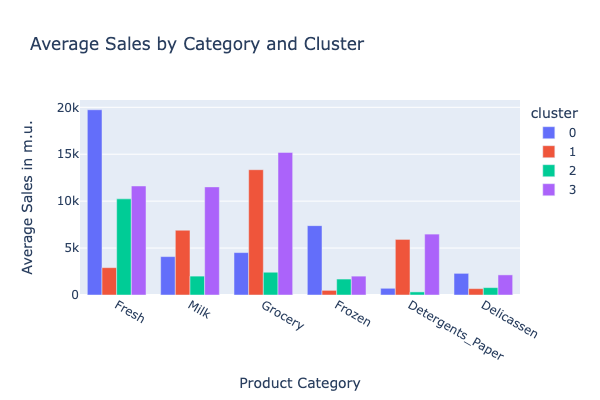

In [126]:
import plotly.express as px

df_unpivot['cluster'] = df_unpivot['cluster'].astype(str)
fig = px.bar(df_unpivot, x='variable', y='value', color='cluster',barmode='group', height=400, title='Average Sales by Category and Cluster')
fig.update_layout(xaxis_title="Product Category", yaxis_title="Average Sales in m.u.")
fig.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

## Note:
Data Preprocessed in part 1. 
I explored multiple dendogram methods, but only kept one for readibility/efficiency of notebook. 

Methods tried - single, complete returned 3 clusters 

In [67]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

# create an object
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 4)


In [68]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

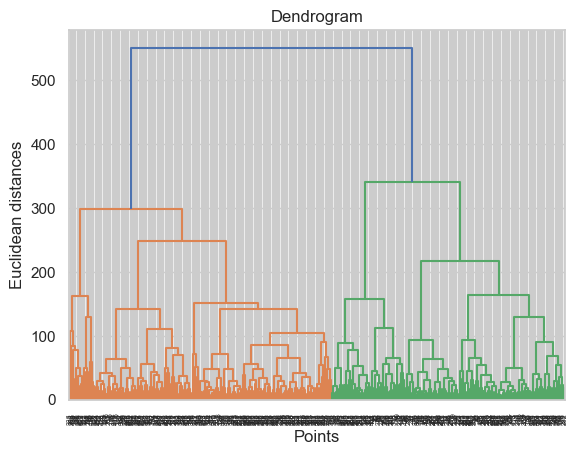

In [69]:
# attempt hierarchical w/ numeric features (not pca)
plot_dendrogram(data_scaled, method='ward') # 

# 

Findings:;
* optimal # clusters = 2 using ward method
* no significant difference between using PCA features and scaled numeric features

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

#### Note: 
* PCA was performed earlier using n_components = 2 to be able to generate visuals for Kmeans
* PCA will be performed again here to determine optimal n_compoments

In [78]:
# importance of each feature in PCA first component

pca_result = pd.DataFrame(data=pca.components_, columns=data_scaled.columns.tolist())
pca_result.iloc[0,:]

Fresh               0.125055
Milk               -0.525847
Grocery            -0.395860
Frozen              0.206138
Detergents_Paper   -0.697397
Delicassen         -0.149285
Name: 0, dtype: float64

In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)

# run pca on numeric features only
dfx_pca = pca.fit_transform(data_scaled)

In [75]:
pca.explained_variance_ratio_

array([0.44529325, 0.27453927, 0.10741645, 0.09504835, 0.05740038,
       0.0203023 ])

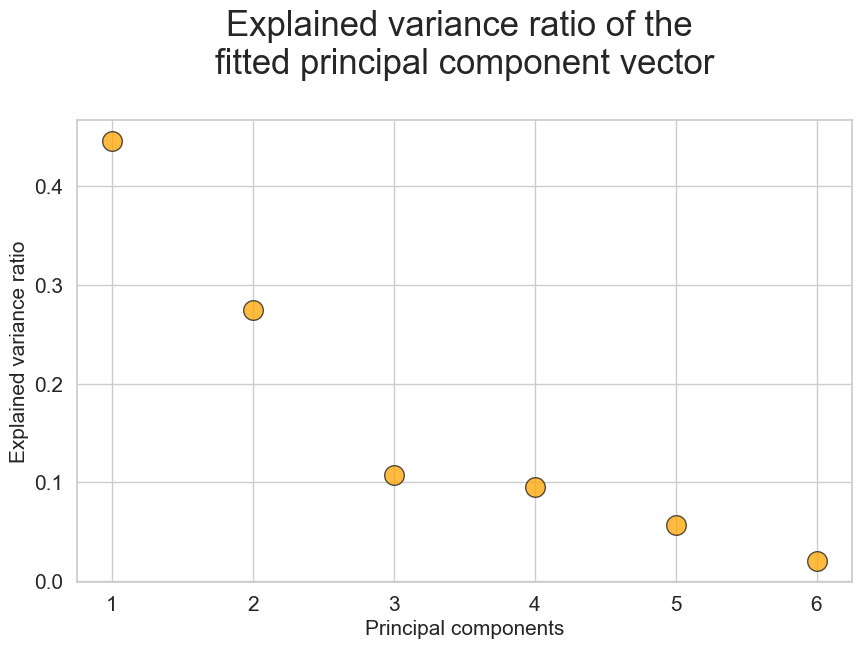

In [76]:

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(pca.explained_variance_ratio_))],
            y=pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [119]:
#first component only
print(f'First component % explained {round(pca.explained_variance_ratio_[:1].sum()*100, 2)}% of variance')
print(f'First two components % explained {round(pca.explained_variance_ratio_[:2].sum()*100, 2)}% of variance')

First component % explained 44.53% of variance
First two components % explained 71.98% of variance


Notes:
* pca makes first component most important 
* the first compnonent explains 44.5% of the variance
* the first 2 components explain nearly 72% of the variance

In [120]:
# for first component what contributed most ? 
# show component values
first_component = pd.DataFrame(abs(pca.components_))
first_component

,0,1,2,3,4,5
0,0.125055,0.525847,0.395860,0.206138,0.697397,0.149285
1,0.498532,0.208102,0.052083,0.707554,0.015239,0.452306
2,0.601444,0.010175,0.053298,0.673591,0.153747,0.397440
3,0.610582,0.037187,0.044530,0.042136,0.282347,0.736430
4,0.015247,0.767506,0.072981,0.035548,0.575642,0.269719
5,0.032393,0.299376,0.911281,0.010498,0.280508,0.009869


In [121]:
# show only PC1 (first component results) 
first_component.iloc[0].sort_values(ascending=False)

4    0.697397
1    0.525847
2    0.395860
3    0.206138
5    0.149285
0    0.125055
Name: 0, dtype: float64

Feature 4, 1, 2 are most important features to the first componen, respectively

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

## Finding 1: What are some themes of each customer ....? 

#### Channel

*What the data says about Channel 1 and Channel 2*
* Chanel 2 purchases much larger volumes than Channel 1

#### Regions

*What the data says about Regions 1, 2, 3*

* Region 3 purchase much more than other 2 channels accross all categories

#### Clusters 

* Cluster # 3 purchases the most Fesh, and the least milk, and low amount of Detergent.
* Cluster # 2 - lowest purchaser in all categories, except ranked 3rd in Frozen
* Cluster # 0 top purchaser in Milk, Grocery, Detergents, Delicassen, second largest Purchaser of Frozen and fresh
* Cluster # 1  - middle/back of the pack purchaser


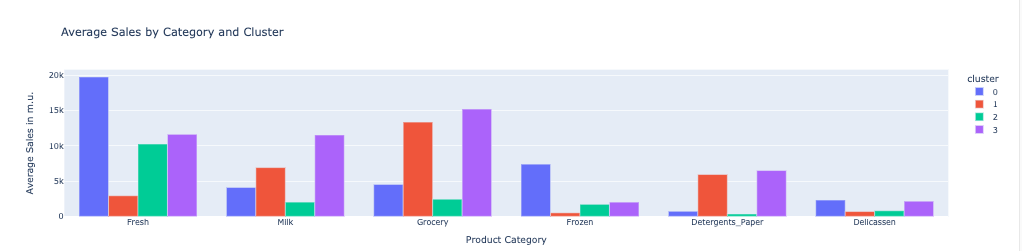

In [137]:
# fig.show()

#### Recommendation

Assuming strategy is to maximize profits of highest spending accounts, offer incentives discounts :
* to cluster 0 clients for fresh, grocery and frozen products 
* to cluster 3 clients for grocery, milk, fresh

### Finding 2: How are product sales related to each other? 
* Several product categories have high to moderate correlation. Detergents_Paper and Grocery have an almost perfectly positive linear relationship (0.92)
    * High correlation (0.7-0.9) -
        * Grocery + Milk, - 0.73
        * Detergents_Paper + Grocery - 0.92
    * Moderate correlation (0.5-0.7) -
        * Grocery * Milk -0.73
        * Detergents_Paper + Milk - 0.66
        * Grocery + Chanel - 0.61
        * Detergents_Paper + Channel - 0.64
    * Weakest correlations (examples)
        * Frozen + Grocery
        * Fresh + Grocery
        
Below are some immages to illustrate the above findings

#### Correlation Matrix of all features
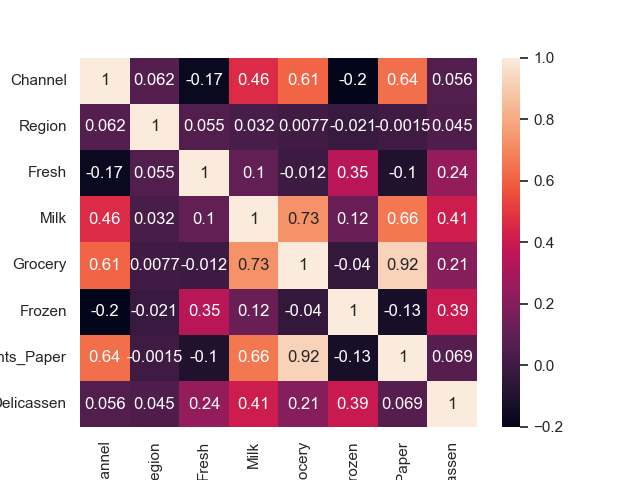

#### Relationship Between Grocery and Paper_Detergents (scatterplot)
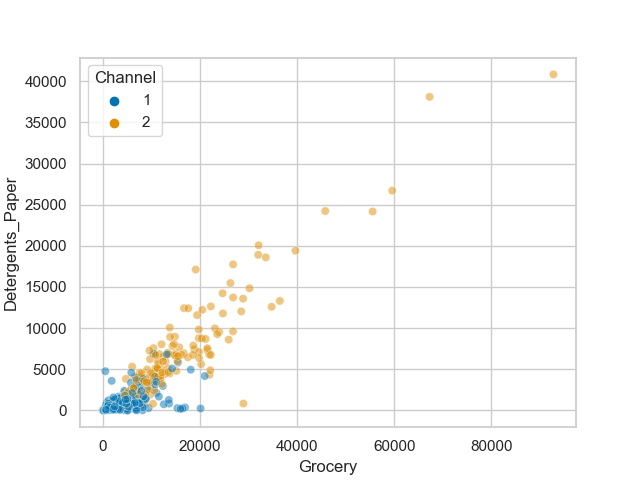

#### Relationship Between Milk and Fresh (scatterplot)
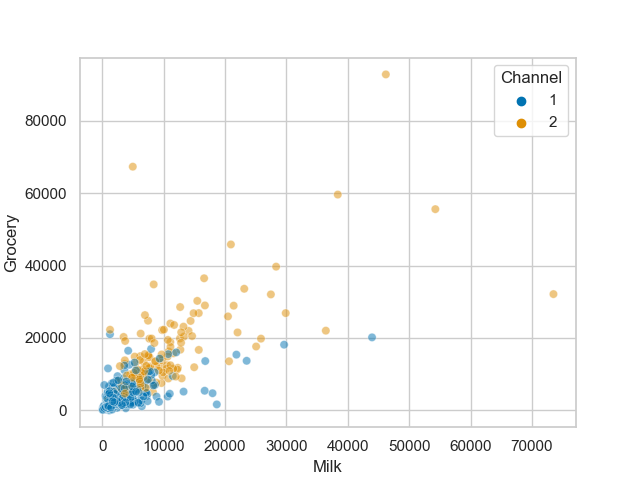

### Finding 3: What is the Optimal Number of Clusters

Based on methods, the optinmal number of clusters varied: 

* K-means: 4
* Hierarchical Clustering : 2
* PCA: 6

### Finding 4: Which regions and channels have the higest average Sales by category?/

#### Sales by Region and Category


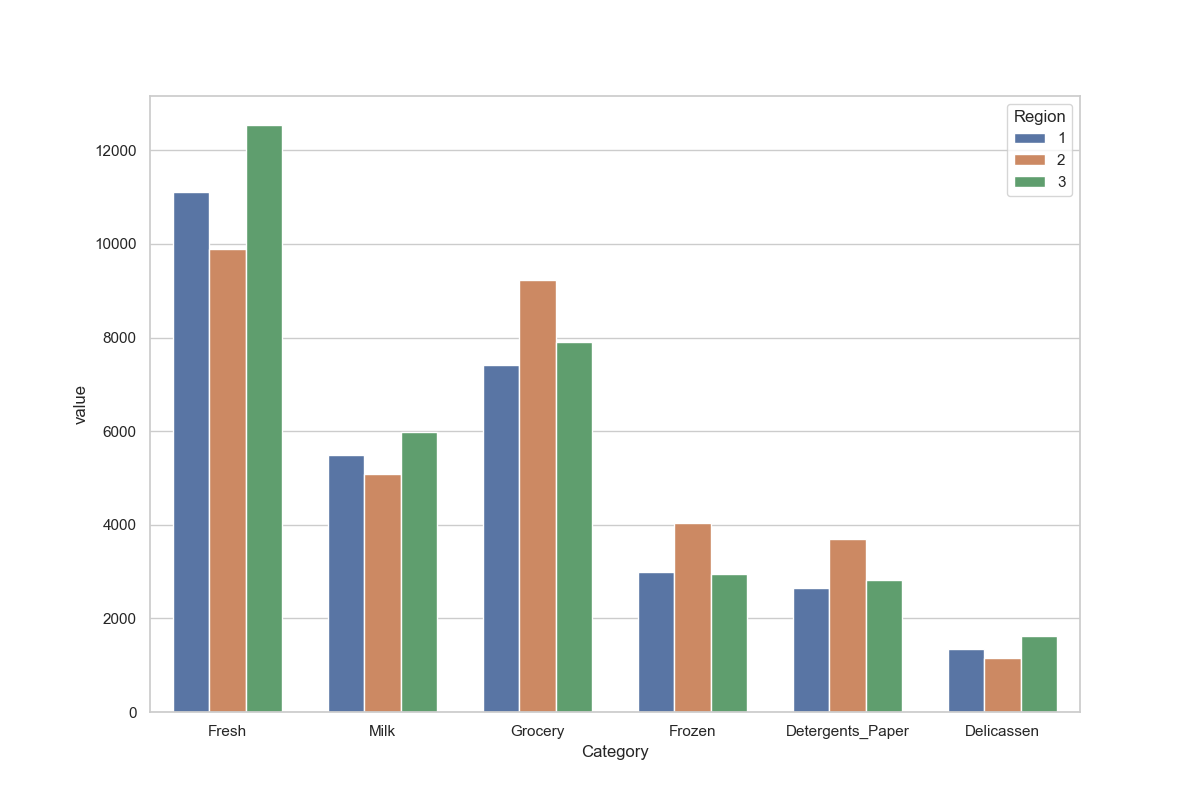

In [ ]:
# average of each feature by cluster, using clean/scaled data
data_clean['cluster'] = cluster
data_clean.groupby('cluster').mean()

In [ ]:
# add cluster as feature into original dataframe 
data['cluster'] = cluster

cluster_analysis = data.groupby('cluster').mean()
cluster_analysis

In [ ]:
ranks = cluster_analysis.rank(ascending=False)
ranks

### Perform Kmeans again using 6 clusters and PCA result

In [ ]:
# generate kmeans object
kmeans = KMeans(n_clusters = 6, random_state = 42)
# fit model to data
kmeans.fit(dfx_pca)
cluster = kmeans.predict(dfx_pca)

In [ ]:
cluster_asst = kmeans.labels_

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')
# visualise the result
scatter_x = dfx_pca[:,0]
scatter_y = dfx_pca[:,1]
group = cluster
cdict = {0: 'purple', 1: 'blue', 2: 'green', 3: 'orange', 4:'pink', 5:'cyan'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = f'Cluster {g}', s = 50)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
# ax.legend()
# plt.show()

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

### Perform Kmeans again using 2 clusters and PCA result - ????

In [ ]:
# kmeans again with result of first 2 components PCA,  vizualize clusters, 
# color = clusters (use same # of clusters as earlier) compare results

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

dfx_pca = pca.fit(data_scaled)

In [ ]:
# generate kmeans object
kmeans = KMeans(n_clusters = 2, random_state = 42)
# fit model to data
kmeans.fit(dfx_pca)
cluster = kmeans.predict(dfx_pca)

In [ ]:
cluster_asst = kmeans.labels_

In [ ]:
# visualise the result
scatter_x = dfx_pca[:,0]
scatter_y = dfx_pca[:,1]
group = cluster
cdict = {0: 'purple', 1: 'blue', 2: 'green', 3: 'orange', 4:'pink', 5:'cyan'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = f'Cluster {g}', s = 50)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
# ax.legend()
# plt.show()

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [ ]:
# visualize clusters with centroids using 6 PCA components
plt.scatter(x=dfx_pca[:,0], y=dfx_pca[:,1], c=cluster, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()